In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Homework 2

## 4 (A) Selecting a pair of stereo images

Take a pair of stereo images, one image, denoted as $S_L(x, y)$, is for the left eye, and one $S_R(x, y)$ for the right eye. Here $x$ and $y$ are the coordinates of the image pixel locations. For example $x = 1, 2, ..., 256$ and $y = 1, 2, ..., 256$. You may find some examples online, for example at this website https://www.londonstereo.com/3-D-gallery1.html. If the original images are colored, remove the color. Plot out the images, each as a luminance image.

In [2]:
left_original = imread("resources/eye1.png")
right_original = imread("resources/eye2.png")

In [3]:
def plot_left_and_right(left, right, apply_lim = False, title_left = "Left", title_right = "Right"):
    max_lim = np.max(np.abs([left, right]))

    plt.subplot(1, 2, 1)
    if apply_lim:
        plt.imshow(left, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(left, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)

    if title_left != "":
        plt.title(title_left)

    plt.subplot(1, 2, 2)
    if apply_lim:
        plt.imshow(right, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(right, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)

    if title_right != "":
        plt.title(title_right)

    plt.tight_layout()
    plt.show()

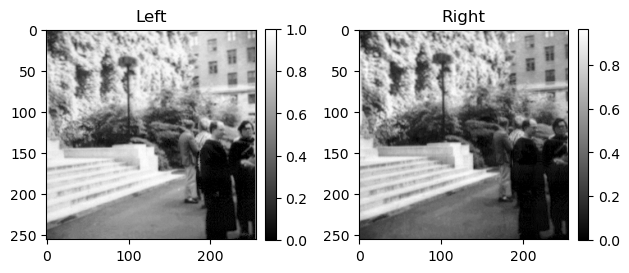

In [4]:
plot_left_and_right(left_original, right_original)

## 4 (B) Normalizing the images

Please normalize each image as follows. For $S_i(x, y)$, with $i = L$ or $i = R$, find $S_i^{min}$ and $S_i^{max}$ as the mininum and maximum of $S_i(x, y)$ across all pixel locations $(x, y)$. Then, for $\hat{S} = 255$, do

$$S_i(x, y) \rightarrow \hat{S} \frac{S_i(x, y) - S_i^{min}}{{S_i^{max} - S_i^{min}}$$

Now $0 \leq S_i(x, y) \leq \hat{S}$. Round each $S_i(x, y)$ into an integer value so that $S_i(x, y)$ is an integer between $0$ and $\hat{S}$.

In [5]:
def normalize(image, s_hat = 255):
    s_min = np.min(image)
    s_max = np.max(image)

    image = s_hat * (image - s_min) / (s_max - s_min)
    image = np.round(image)

    return image

In [6]:
left = normalize(left_original)
right = normalize(right_original)

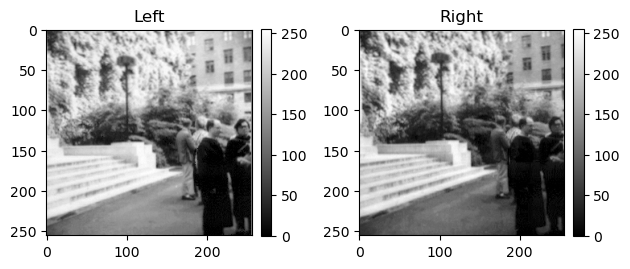

In [7]:
plot_left_and_right(left, right)

## 4 (C) Signal probability

For each $S_i(x, y)$, with $i = L$ or $i = R$, calculate the probability $P(S)$ for $S_i(x, y) = S$ across all $(x, y)$. This means, for each $S = 0, 1, 2, \dots, \hat{S}$, let $n(S)$ be the number of pixels $(x, y)$ for which $S_i(x, y) = S$, and let $N$ be the total number of pixels in $S_i$, then $P(S) = \frac{n(S)}{N}$.
Plot out $P(S)$ vs $S$ for each image $S_i$.

In [8]:
def probability(x, min_val = 0, max_val = 255):
    bins = np.linspace(min_val, max_val + 1, num = max_val + 2)
    return [bins[:-1], np.histogram(x, bins = bins)[0] / np.size(x)]

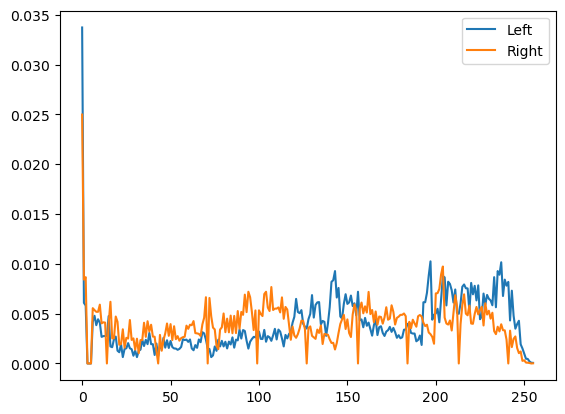

In [9]:
s, p = probability(left)
plt.plot(s, p, label = "Left")

s, p = probability(right)
plt.plot(s, p, label = "Right")

plt.legend()
plt.show()

## 4 (D) Signal entropy

For each $S_i(x, y)$, with $i = L$ or $i = R$, calculate the pixel entropy
$$H(S_i) = - \sum_{S_i} P(S_i)\ log_2\ P(S_i)$$

Please note that, if for some values $S$ you have $P(S) = 0$, in such a case $P(S)\ log_2\ P(S) = 0$. Your computer will complain if you try to calculate $log_2\ P(S)$ when $P(S) = 0$. So omit these $S$ values with zero $P(S)$ when doing the sum above.

Write out what $H(S)$ is for each image $S_i$.

In [10]:
def entropy(probs):
    return -np.sum([p * np.log2(p) if p > 0 else 0 for p in probs])

In [11]:
_, p = probability(left)
print(f"Entropy for i = L: {round(entropy(p), 2)}")

_, p = probability(right)
print(f"Entropy for i = R: {round(entropy(p), 2)}")

Entropy for i = L: 7.68
Entropy for i = R: 7.76


## 4 (E) Joint probability

Calculate the joint probability $P(S_1, S_2)$ of $S_L(x, y) = S_1$ and $S_R(x, y) = S_2$ for $S_1 = 0, 1, 2, \dots, \hat{S}$ and $S_2 = 0, 1, 2, \dots, \hat{S}$. This means, for each possible pair of values $(S_1, S_2)$, go across all pixels $(x, y)$ to find $n(S_1, S_2)$ as the number of pixels satisfying $S_L(x, y) = S_1$ and $S_R(x, y) = S_2$. Then $P(S_1, S_2) = \frac{n(S_1, S_2)}{N}$.
Plot out $P(S_1, S_2)$ (which is the joint probability distribution function) versus $S_1$ and $S_2$.

In [12]:
def joint_probability(x, y, min_val = 0, max_val = 255):
    counts = np.zeros(shape = (max_val - min_val + 1, max_val - min_val + 1))

    for i in range(0, max_val + 1):
        for j in range(0, max_val + 1):
            counts[i, j] = np.sum(np.logical_and(x == i, y == j))

    return counts / np.size(x)

In [13]:
probs = joint_probability(left, right)

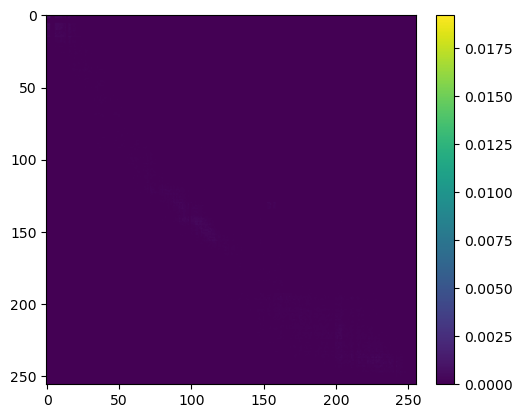

In [14]:
plt.imshow(probs)
plt.colorbar(fraction = 0.046, pad = 0.04)
plt.show()

## 4 (F) Joint entropy

Calculate joint entropy as

$$H(S_1, S_2) = - \sum_{S_1, S_2} P(S_1, S_2)\ log_2\ P(S_1, S_2)$$

Write out the value for H(S_1, S_2).

In [15]:
print(f"Joint entropy: {round(entropy(probs.flatten()), 2)}")

Joint entropy: 13.72


## 4 (G) Mutual information

Calculate mutual information between corresponding pixels in the two images as

$$I(S_1, S_2) = \sum_{S_1, S_2} P(S_1, S_2)\ log_2\ \frac{P(S_1, S_2)}{P(S_1)P(S_2)} = H(S_1) + H(S_2) - H(S_1, S_2)$$

Write out the value for $I(S_1, S_2)$.

In [16]:
def mutual_information(x, y, min_val = 0, max_val = 255):
    _, p = probability(x, min_val = min_val, max_val = max_val)
    entropy_x = entropy(p)

    _, p = probability(y, min_val = min_val, max_val = max_val)
    entropy_y = entropy(p)

    p = joint_probability(x, y, min_val = min_val, max_val = max_val)
    entropy_xy = entropy(p.flatten())

    return entropy_x + entropy_y - entropy_xy

In [17]:
print(f"Mutual information: {round(mutual_information(left, right), 2)}")

Mutual information: 1.73


## 4 (H) Redundancy

Calculate the redundancy between the left and right eye images as

$$\text{Redundancy} = \frac{H(S_1) + H(S_2)}{H(S_1, S_2)} - 1$$

In [18]:
def redundancy(x, y, min_val = 0, max_val = 255):
    _, p = probability(x, min_val = min_val, max_val = max_val)
    entropy_x = entropy(p)

    _, p = probability(y, min_val = min_val, max_val = max_val)
    entropy_y = entropy(p)

    p = joint_probability(x, y, min_val = min_val, max_val = max_val)
    entropy_xy = entropy(p.flatten())

    return ((entropy_x + entropy_y) / entropy_xy) - 1

In [19]:
print(f"Redundancy: {round(redundancy(left, right), 2)}")

Redundancy: 0.13


## 4 (I) Using $n$ bits to present each image pixel

So far, you have done (B)-(H) when the highest pixel value is $\hat{S} = 255$. Now, repeat (B)-(H) for $\hat{S} = 127, 63, 31, 15, 7, 3, 1$. In other words, you can take $\hat{S} = 2^n - 1$ for $n = 1, 2, 3, \dots, 8$ (so that $\hat{S} = 255$ when $n = 8$), so that you use $n$ bits to present each image pixel. Plot $H(S_i)$, $H(S_1, S_2)$, $I(S_1, S_2)$ and Redundancy as functions of $n$. Also, please plot out the two images for each $n$ value, and see if they make sense.

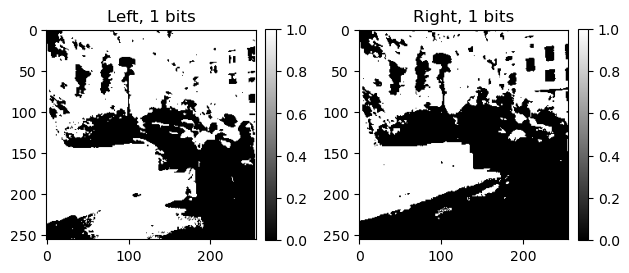

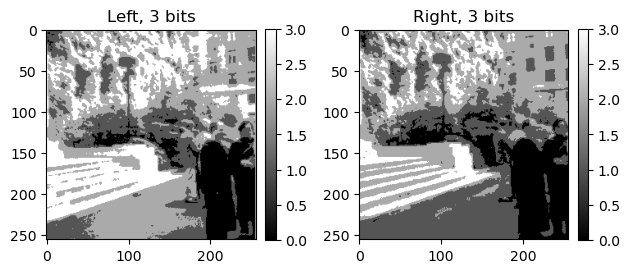

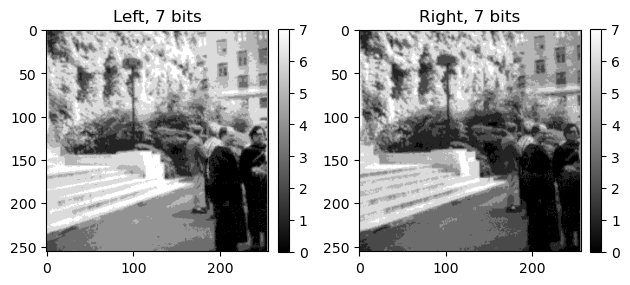

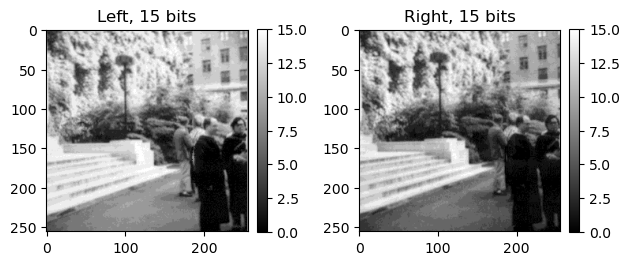

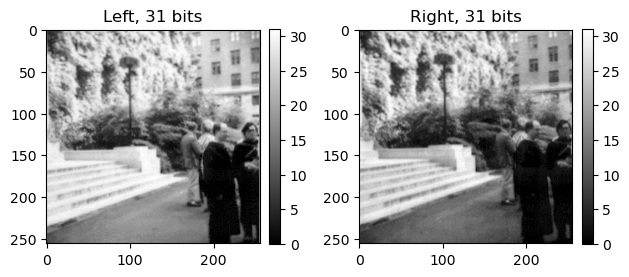

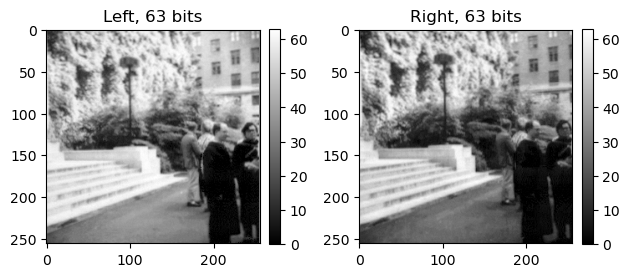

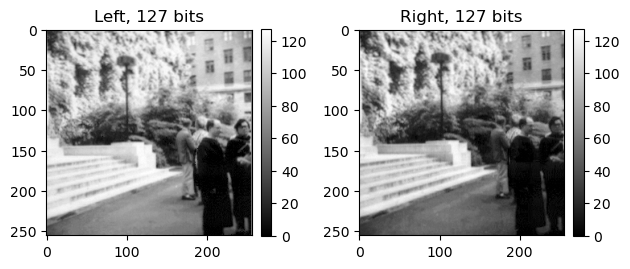

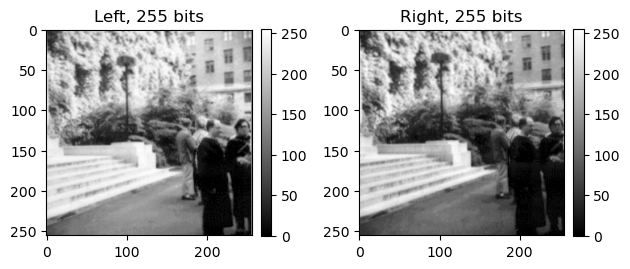

In [20]:
h_l = []
h_r = []
h_rl = []
i_rl = []
red = []
n_bits = []

for n_bit in range(1, 9):
    s_hat = round(math.pow(2, n_bit) - 1)
    n_bits.append(n_bit)

    _left = normalize(left_original, s_hat = s_hat)
    _right = normalize(right_original, s_hat = s_hat)

    plot_left_and_right(_left, _right, title_left = f"Left, {s_hat} bits", title_right = f"Right, {s_hat} bits")

    _, p = probability(_left, max_val = s_hat)
    h_l.append(entropy(p))

    _, p = probability(_right, max_val = s_hat)
    h_r.append(entropy(p))

    p = joint_probability(_left, _right, max_val = s_hat)
    h_rl.append(entropy(p.flatten()))

    i_rl.append(mutual_information(_left, _right))

    red.append(redundancy(_left, _right, max_val = s_hat))

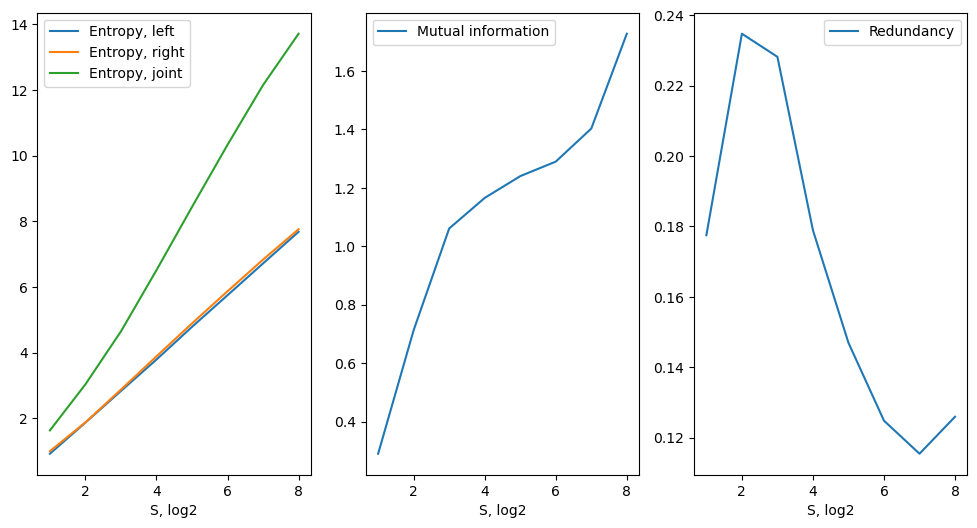

In [21]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 3, 1)
plt.plot(n_bits, h_l, label = "Entropy, left")
plt.plot(n_bits, h_r, label = "Entropy, right")
plt.plot(n_bits, h_rl, label = "Entropy, joint")
plt.legend()
plt.xlabel("S, log2")

plt.subplot(1, 3, 2)
plt.plot(n_bits, i_rl, label = "Mutual information")
plt.legend()
plt.xlabel("S, log2")

plt.subplot(1, 3, 3)
plt.plot(n_bits, red, label = "Redundancy")
plt.legend()
plt.xlabel("S, log2")
plt.show()

## 4 (J) Correlation

Let us go back to take $\hat{S} = 255$, so that each $S(x, y)$ pixel is represented by 8 bits.
For each image $S(x, y)$, let

$$
\bar{S}_i = \sum_{x, y} \frac{S_i(x, y)}{N}
$$

be the average value of $S(x, y)$ across all the image pixels. Then shift the pixel value

$$
S_i(x, y) \rightarrow S_i(x, y) - \bar{S}_i
$$

so that each image should now have a zero mean value.

Now, the correlation between $S_i(x, y)$ and $S_j(x, y)$ across pixels is

\begin{equation*}
\begin{split}
R^S_{ij} &= \langle S_i S_j \rangle \\
&= \frac{\sum_{x, y} S_i(x, y) S_j(x, y)}{\sum_{x, y} 1} \\
&= \frac{\sum_{x, y} S_i(x, y) S_j(x, y)}{N}
\end{split}
\end{equation*}

So you can get a $2 \times 2$ matrix $R^S$ with elements $R_{ij}^S$ for $i = 1, 2$ and $j = 1, 2$.

$$
R^S = \begin{pmatrix}
R_{11}^S & R_{12}^S \\
R_{21}^S & R_{22}^S
\end{pmatrix}
$$

The diagonal element, $R_{11}^S$ and $R_{22}^S$ of this matrix are the variance of pixel values in each monocular image, and the off-diagonal values are the covariance between the two monocular images. Please write out this matrix value.

In [45]:
shifted_left = left - np.mean(left)
shifted_right = right - np.mean(right)
N = np.size(shifted_left)

In [48]:
r = np.array([
    [np.sum(shifted_left * shifted_left) / N, np.sum(shifted_left * shifted_right) / N],
    [np.sum(shifted_right * shifted_left) / N, np.sum(shifted_right * shifted_right) / N]
])

In [49]:
r

array([[5273.47167969, 4536.80761719],
       [4536.80761719, 5107.01367188]])

## 4 (K) Scatter plot

Give a scatter plot of $S_L(x, y)$ versus $S_R(x, y)$. This means, start with a plot with horizontal and vertical axes, plot a point at location $(S_L(x, y), S_R(x, y))$, with the value of $S_L(x, y)$ and $S_R(x, y)$ on the horizontal and vertical axes respectively, for each pixel $(x, y)$ in images $S_L(x, y)$ and $S_R(x, y)$. Compare your plot with one in Figure 1, and see if they look similar.


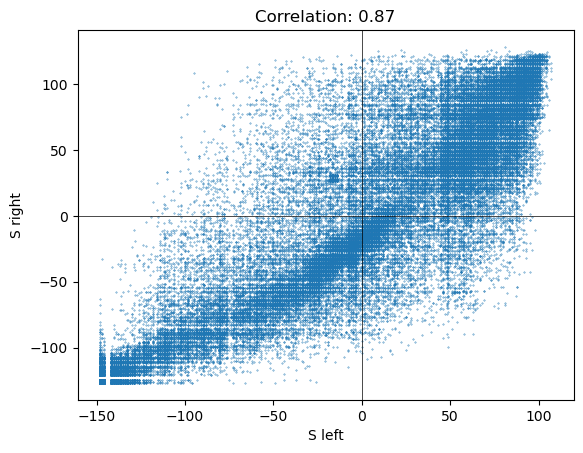

In [106]:
corr = np.corrcoef(shifted_left.flatten(), shifted_right.flatten())[1][0]

plt.scatter(shifted_left.flatten(), shifted_right.flatten(), s = 0.1)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("S left")
plt.ylabel("S right")
plt.title(f"Correlation: {round(corr, 2)}")
plt.show()

## 4 (L) Eigenvalues and eigenvectors

Calculate the eigenvalues and eigenvectors of the $2 \times 2$ matrix $R^S$. Plot each eigenvector as a vector in the scatter plot you obtained above in (K), and observe how each eigenvector is related to the character of this scatter plot of data, and observe how each eigenvalue is related to the variance of the data projected onto each eigenvector.

In [91]:
eigenvalues, eigenvectors = np.linalg.eig(r)

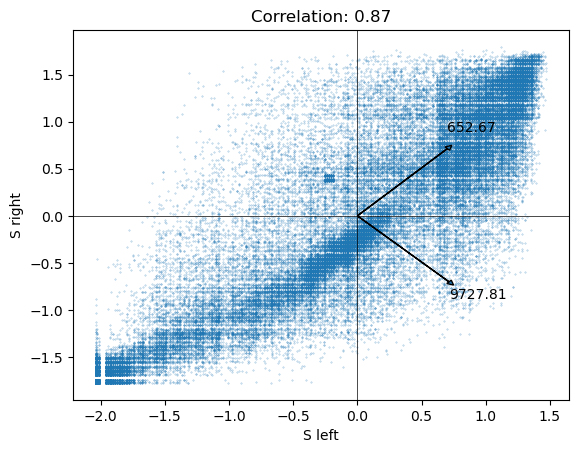

In [107]:
plt.scatter(shifted_left.flatten() / np.std(shifted_left), shifted_right.flatten() / np.std(shifted_right),
            s = 0.1, alpha = 0.5)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("S left")
plt.ylabel("S right")
plt.title(f"Correlation: {round(corr, 2)}")

plt.arrow(0, 0, eigenvectors[0, 0], eigenvectors[0, 1], head_width = 0.05, head_length = 0.05)
plt.annotate(text = round(eigenvalues[0], 2), xy = (eigenvectors[0, 0], eigenvectors[0, 1] * 1.25))

plt.arrow(0, 0, eigenvectors[1, 0], eigenvectors[1, 1], head_width = 0.05, head_length = 0.05)
plt.annotate(text = round(eigenvalues[1], 2), xy = (eigenvectors[1, 0], eigenvectors[1, 1] * 1.25))

plt.show()

## 4 (M) Image decorrelation

Define

$$
S_{+}(x, y) = \frac{1}{\sqrt{2}}(S_L(x, y) + S_R(x, y))
$$

$$
S_{-}(x, y) = \frac{1}{\sqrt{2}}(-S_L(x, y) + S_R(x, y))
$$

Now $S_{+}(x, y)$ and $S_{-}(x, y)$ are two new images. Plot them out. Their pixel values are the projections of the original data $(S_L(x, y), S_R(x, y))$ onto the eigenvectors, or they are the principal components of the data.


In [124]:
theta = math.radians(45)
k_o = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
s_matrix = np.array([shifted_left.flatten(), shifted_right.flatten()])

s_decorrelated = np.matmul(k_o, s_matrix)

s_plus = np.reshape(s_decorrelated[0, :], newshape = shifted_left.shape)
s_minus = np.reshape(s_decorrelated[1, :], newshape = shifted_right.shape)

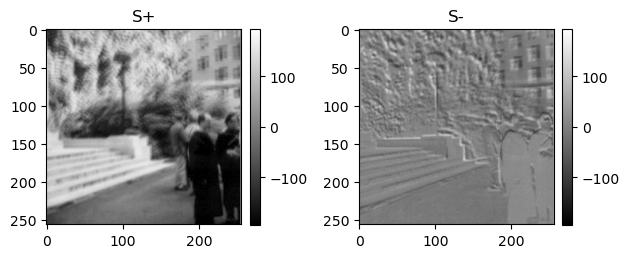

In [125]:
plot_left_and_right(s_plus, s_minus, apply_lim = True, title_left = "S+", title_right = "S-")

## 4 (N) Correlation of de-correlated images

Calculate the $2 \times 2$ correlation matrix with elements

$$
R_{ij}^S \equiv \langle S_i S_j \rangle
$$

with $i = +$ or $-$ and $j = +$ or $-$. Write out the correlation matrix

$$
R^S = \begin{pmatrix}
R_{++}^S & R_{+-}^S \\
R_{-+}^S & R_{--}^S
\end{pmatrix}
$$

and verify that the off diagonal elements $R_{+-}^S = R_{-+}^S \approx 0$ in comparison to the diagonal elements. Reflect on what this means. Do a scatter plot of data points $(S_{+}(x, y), S_{-}(x, y))$ using all pixels $(x, y)$ and observe how the matrix $R^S$ reflects the character of the data in the scatter plot. Observe the variance of $S_{+}(x, y)$ versus the variance of $S_{-}(x, y)$. Which one has a larger variance?


## 4 (O) Gain control

Give gains $g_{+}$ and $g_{-}$ to $S_{+}(x, y)$ and $S_{-}(x, y)$, respectively, to create the gain controlled images

$$
O_{+}(x, y) = g_{+}S_{+}(x, y)
$$

$$
O_{-}(x, y) = g_{-}S_{-}(x, y)
$$

Let the gain values be

$$
g_{+} = \frac{1}{\sqrt{R^S_{++}}},\ g_{-} = \frac{1}{\sqrt{R^S_{--}}}
$$

Plot the two images $O_{+}(x, y)$ and $O_{-}(x, y)$.

## 4 (P) Correlation of gain controlled images

Do a scatter plot of data $(O_{+}(x, y), O_{-}(x, y))$, and calculate the correlation matrix $R^O$ with matrix element

$$
R_{ij}^O \equiv \langle O_i O_j \rangle
$$

with $i = +$ or $-$ and $j = +$ or $-$. Write out the correlation matrix

$$
R^O = \begin{pmatrix}
R_{++}^O & R_{+-}^O \\
R_{-+}^O & R_{--}^O
\end{pmatrix}
$$

You should see that $O_{+}(x, y)$ and $O_{-}(x, y)$ are not correlated with each other, but have roughly the same variance. This is because we used the gains $g_{+}$ and $g_{-}$ which are for whitening.


## 4 (Q) Output images

Construct two new images $O_1(x, y)$ and $O_2(x, y)$ from $O_{\pm}(x, y)$ as follows

$$
O_{1}(x, y) = \frac{1}{\sqrt{2}}(O_{+}(x, y) + O_{-}(x, y))
$$

$$
O_{2}(x, y) = \frac{1}{\sqrt{2}}(-O_{+}(x, y) + O_{-}(x, y))
$$

and plot them out. Also, do a scatter plot of data $(O_1(x, y), O_2(x, y))$. You should see that $O_1(x, y)$ and $O_2(x, y)$ are not correlated with each other, but have roughly the same variance.


## 4 (R) Output correlation

Construct the $2 \times 2$ correlation matrix with elements

$$
R_{ij}^O \equiv \langle O_i O_j \rangle
$$

with $i = 1$ or $2$ and $j = 1$ or $2$, for the matrix

$$
R^O = \begin{pmatrix}
R_{11}^O & R_{12}^O \\
R_{21}^O & R_{22}^O
\end{pmatrix}
$$

Relate this matrix with the scatter plot in (Q).
